In [1]:
import pandas as pd
from pathlib import Path

# Définir les chemins
PROJECT_ROOT = Path("..").resolve()
DATA_OUTPUTS = PROJECT_ROOT / "data" / "outputs"

# Chargement des deux bases
df_profils = pd.read_csv(DATA_OUTPUTS / "df_profils.csv")
df_competences = pd.read_csv(DATA_OUTPUTS / "df_competences.csv")

# Fusion sur l'identifiant unique
df_analytique = pd.merge(df_profils, df_competences, on="enseignant_uid", how="inner")

# Export du fichier fusionné
df_analytique.to_csv(DATA_OUTPUTS / "df_analytique.csv", index=False)

# Aperçu rapide
print("✅ df_analytique fusionné avec", df_analytique.shape[0], "enseignants et", df_analytique.shape[1], "variables")
df_analytique.head()


✅ df_analytique fusionné avec 3 enseignants et 41 variables


,enseignant_uid,age,statut_administratif,etablissement,annees_experience_totale,nb_pays_enseignes,nb_etablissements_carriere,annees_enseignement_france,annees_enseignement_mlf,annees_enseignement_aefe,...,conception_evaluation_suivi_score,outil_numerique_benefices_score,outils_suivi_apprentissage_score,climat_classe_score,adaptation_pratiques_specifiques_score,lien_apprentissages_parcours_score,projets_collaboration_impact_score,implication_parents_suivi_score,integration_contexte_etablissement_score,score_global
0,E0001,38,Contrat local,Lycée Français International Le Détroit Tanger,16,1,6,0,6,0,...,1,1,0,2,2,0,2,1,1,1.2
1,E0002,49,Détachement,Lycée Français International André Malraux Rabat,20,1,3,1,19,1,...,2,1,1,2,0,1,1,2,0,1.1
2,E0003,46,Contrat local,Lycée Français International André Malraux Rabat,22,2,4,20,20,0,...,2,1,1,1,2,1,2,0,1,1.2


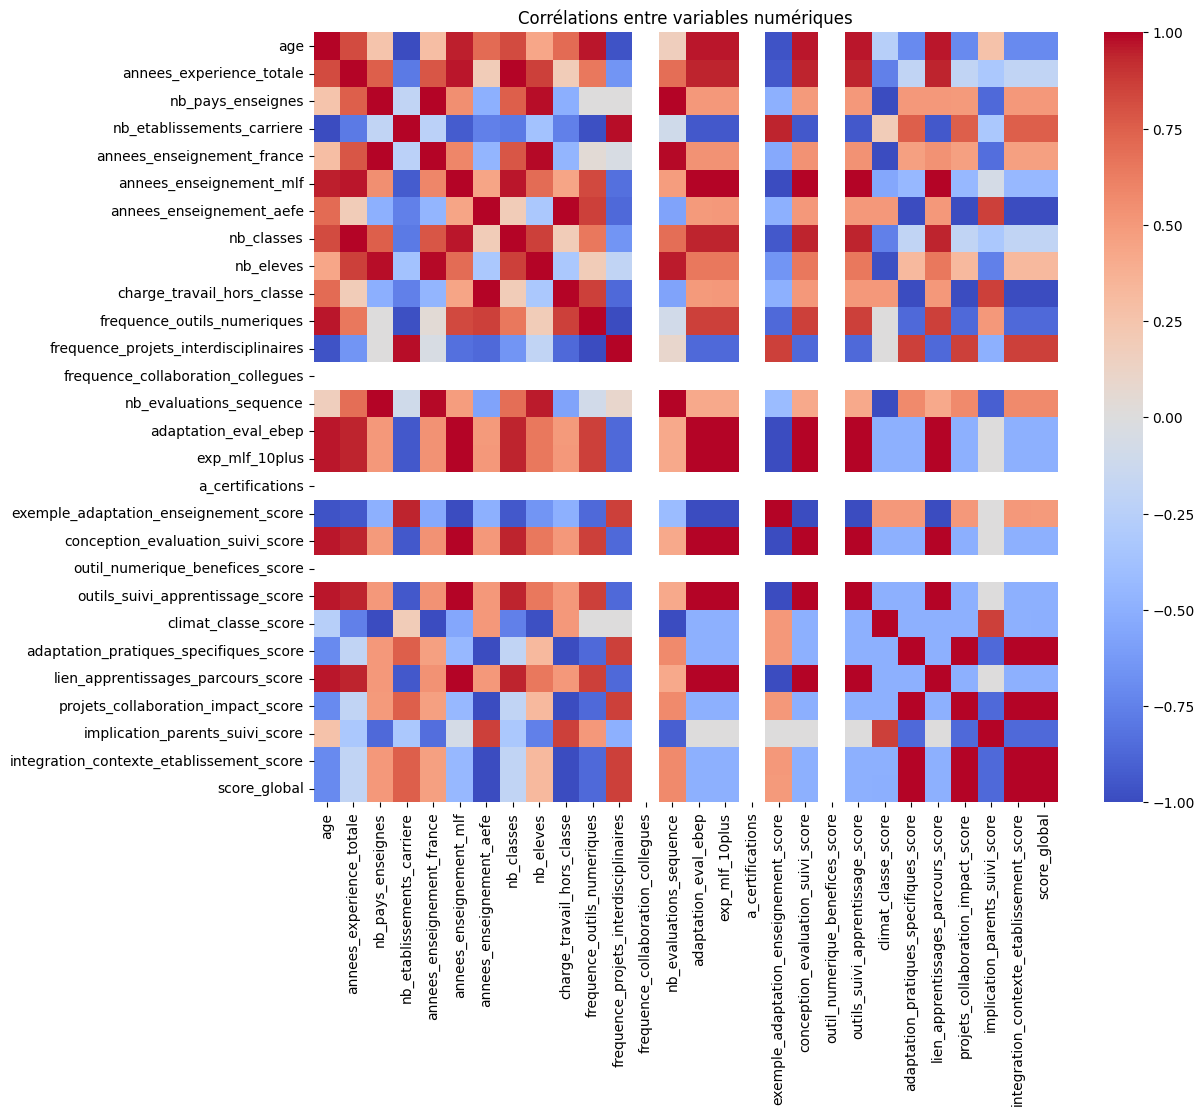

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df_analytique.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Corrélations entre variables numériques")
plt.show()
